Text(0.5, 1.0, 'non heap memory usage')

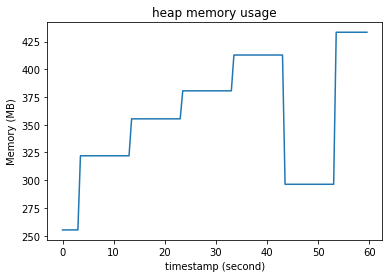

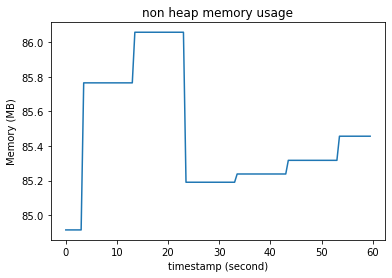

In [30]:
import json
import requests
from time import sleep
import matplotlib.pyplot as plt

# This is the url for the api
URL = "http://localhost:8081/"

heap_args = 'Status.JVM.Memory.Heap.Used'
non_heap_args = 'Status.JVM.Memory.NonHeap.Used'

sleep_time = 0.5 # 0.5 second
busy_machine_run_time = 60 # assume the busy machine task time is 60 seconds
job_scheduling_run_time = 5 # assume the job scheduling task time is 60 seconds

run_time = busy_machine_run_time
# run_time = job_scheduling_run_time

heap_records = []
non_heap_records = []
timestamps = [0.5*i for i in range(int(run_time/sleep_time))]

for _ in timestamps:
    r = requests.get(URL + "taskmanagers/metrics?get=" + heap_args + "&&get=" + non_heap_args)
    resp = r.json()
    heap_records.append(resp[0]['avg'] / 10**6)  # result is in byte format, need to divide 10**6 to transfer to MB
    non_heap_records.append(resp[1]['avg'] / 10**6)
    sleep(sleep_time)

plt.figure()
plt.plot(timestamps, heap_records)
plt.xlabel('timestamp (second)')
plt.ylabel('Memory (MB)')
plt.title('heap memory usage')

plt.figure()
plt.plot(timestamps, non_heap_records)
plt.xlabel('timestamp (second)')
plt.ylabel('Memory (MB)')
plt.title('non heap memory usage')